<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week06/ensemble_trees_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Trees Exercise
- Michael Vincent
- 7/24/22

## Imports

In [32]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Load the data

In [4]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRxWTr9Gjp_AiHyqsT1adO2eS-_KE4XkTVJ6bi04GpRYANckVLyR1oIvlpIabrMJe3Y6YKO5VvM7RoF/pub?output=csv'
df = pd.read_csv(url)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


## Explore the data

In [12]:
# Explore the data
print('There are', df.duplicated().sum(), 'duplicates in the data set.')
print('There are', df.isna().sum().sum(), 'missing values in the data set.\n')

df.info()

There are 0 duplicates in the data set.
There are 0 missing values in the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


> There are no missing values and no duplicates. All of the data is numerical. No cleaning is required before constructing the model.

## Set the features and target and split the data.

In [11]:
# Set the features and target
y = df['PRICE']
X = df.drop(columns = 'PRICE')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Build the decision tree model

In [39]:
# Tune the decision tree model by max_depth
depths = list(range(1,100))
scores_dec = pd.DataFrame(index = depths, columns = ['Test_r2', 'Test_MAE', 'Test_MSE'])
for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
  dec_tree.fit(X_train, y_train)
  dec_pred = dec_tree.predict(X_test)
  scores_dec.loc[depth, 'Test_r2'] = dec_tree.score(X_test, y_test)
  scores_dec.loc[depth, 'Test_MAE'] = mean_absolute_error(y_test, dec_pred)
  scores_dec.loc[depth, 'Test_MSE'] = mean_squared_error(y_test, dec_pred)

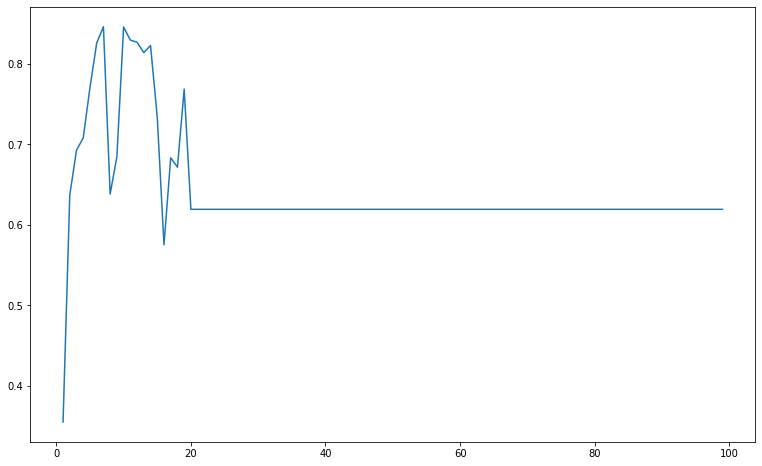

In [73]:
# Graph the r2 score
plt.figure(figsize = (13, 8))
plt.plot(depths, scores_dec['Test_r2'])

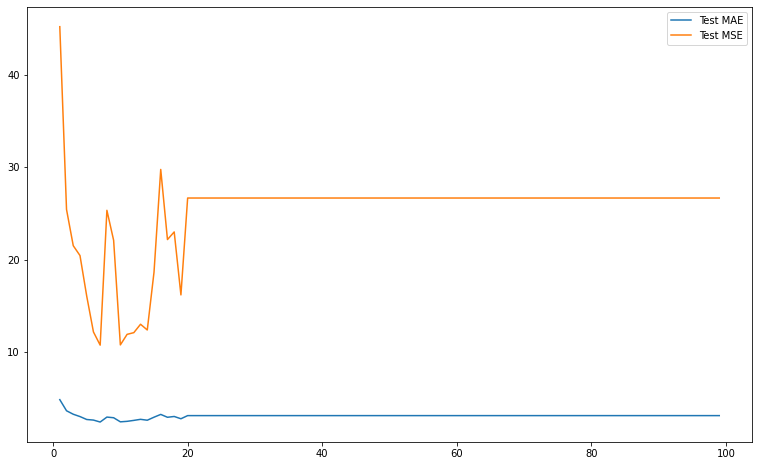

In [72]:
# Graph the MAE and MSE
plt.figure(figsize = (13, 8))
plt.plot(depths, scores_dec['Test_MAE'], label = 'Test MAE')
plt.plot(depths, scores_dec['Test_MSE'], label = 'Test MSE')
plt.legend()

In [38]:
# Use the DataFrame of scores to find the best maximum depth of the tree.
scores_dec.iloc[15:25]

,Test_r2,Test_MAE,Test_MSE
16,0.57521,3.270604,29.746846
17,0.68343,2.96168,22.16848
18,0.671661,3.048031,22.992677
19,0.768847,2.801181,16.186988
20,0.619323,3.140945,26.657717
21,0.619323,3.140945,26.657717
22,0.619323,3.140945,26.657717
23,0.619323,3.140945,26.657717
24,0.619323,3.140945,26.657717
25,0.619323,3.140945,26.657717


> Based on the above we will set the set the max depth to be 19. This gives us an r2 score of abouth 0.77, which says our model accounts by about 77% of the variation in the data. Our mean absolute error is about \$2800, which says our model makes predictions of house prices that are off by about \$2800 on average. This seems to be a reasonable model.

## Build the Bagged Tree Model

In [59]:
# Tune the bagged tree model by the number of estimators
estimators = list(range(5, 155, 5))
scores_bag = pd.DataFrame(index = estimators, columns = ['Test R2', 'Test MAE', 'Test MSE'])
for est in estimators:
  bag_tree = BaggingRegressor(n_estimators = est, random_state = 42)
  bag_tree.fit(X_train, y_train)
  bag_pred = bag_tree.predict(X_test)
  scores_bag.loc[est, 'Test R2'] = bag_tree.score(X_test, y_test)
  scores_bag.loc[est, 'Test MAE'] = mean_absolute_error(y_test, bag_pred)
  scores_bag.loc[est, 'Test MSE'] = mean_squared_error(y_test, bag_pred)

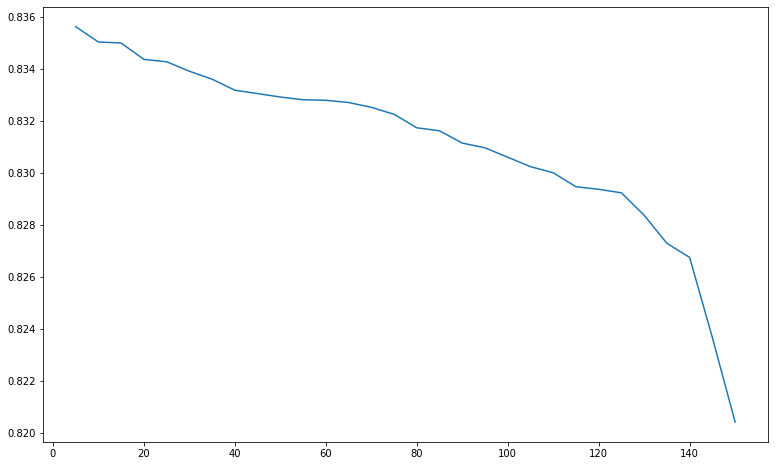

In [74]:
# Graph the r2 score
plt.figure(figsize = (13, 8))
plt.plot(estimators, scores_bag['Test R2'])

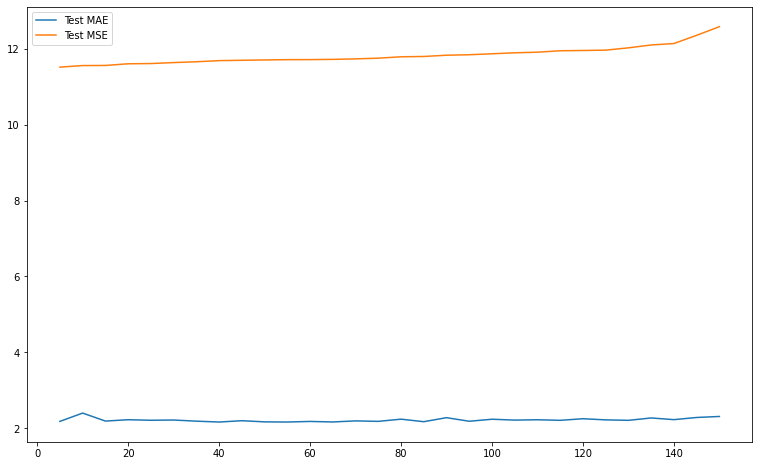

In [75]:
# Graph the errors
plt.figure(figsize = (13, 8))
plt.plot(estimators, scores_bag['Test MAE'], label = 'Test MAE')
plt.plot(estimators, scores_bag['Test MSE'], label = 'Test MSE')
plt.legend()

In [78]:
# Sort the scores
scores_bag = scores_bag.sort_values(by = 'Test R2', ascending = False)
scores_bag.head()

,Test R2,Test MAE,Test MSE
110,0.835623,2.1866,11.510862
5,0.835033,2.404409,11.552157
105,0.834995,2.194391,11.554818
40,0.834365,2.229783,11.598921
55,0.834274,2.215634,11.605293


> Based on the above we will choose the n_estimators parameter for the bagged tree model to be 110. This gives us an R2 score of about 0.84. This is an improvement on the decision tree model. Based on our test data we predict our model accounts for 84% of the variation in the data. We also got an improvement on the mean absolute error and predict a typical prediction to be off by about \$2200.

## Build the Random Forest Model

In [91]:
# Tune the model by max_depth
depths = list(range(1,50))
scores_rf = pd.DataFrame(index = depths, columns = ['Test R2', 'Test MAE', 'Test MSE'])
for depth in depths:
  rf = RandomForestRegressor(max_depth = depth, random_state = 42)
  rf.fit(X_train, y_train)
  rf_pred = rf.predict(X_test)
  scores_rf.loc[depth, 'Test R2'] = rf.score(X_test, y_test)
  scores_rf.loc[depth, 'Test MAE'] = mean_absolute_error(y_test, rf_pred)
  scores_rf.loc[depth, 'Test MSE'] = mean_squared_error(y_test, rf_pred)

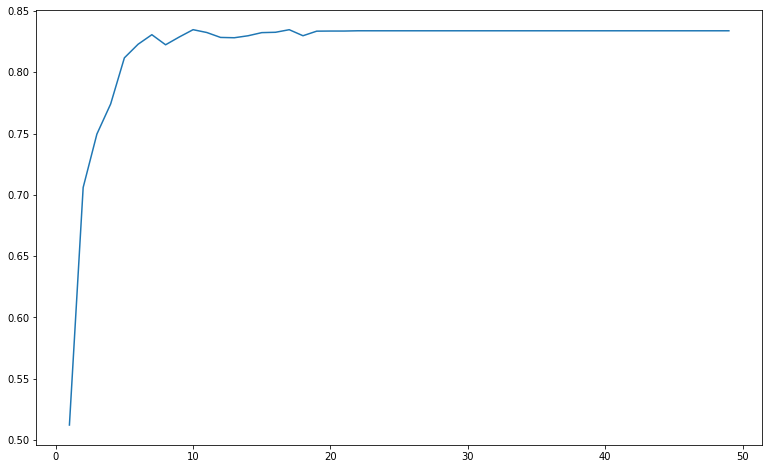

In [92]:
# Graph the R2 scores
plt.figure(figsize = (13, 8))
plt.plot(scores_rf['Test R2'])

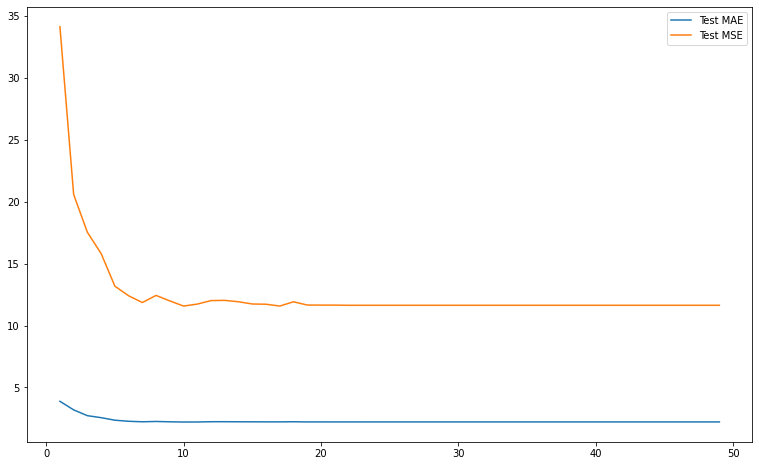

In [94]:
# Graph the errors
plt.figure(figsize = (13, 8))
plt.plot(scores_rf['Test MAE'], label = 'Test MAE')
plt.plot(scores_rf['Test MSE'], label = 'Test MSE')
plt.legend()

In [98]:
# Sort the scores
scores_rf = scores_rf.sort_values(by = 'Test R2', ascending = False)
scores_rf.head()

,Test R2,Test MAE,Test MSE
10,0.834747,2.198828,11.572214
17,0.834732,2.212516,11.573256
22,0.83386,2.208307,11.634292
25,0.833853,2.207858,11.634795
37,0.833853,2.207858,11.634795


> We see from the above that a random forest with max_depth set equal to 10 gives about the same performance as a bagged tree with 110 estimators. 

## Build the final model

Based on the analyses from above we will be choosing a random forest with a max_depth of 10. This model has an R2 of 0.84 on the test set which predicts our model accounts for about 84% of the variance in the data. Our mean absolute errer on the test set is about 2.2 which says a typical prediction will be off by about \$2200.

In [99]:
# Build the model
model = RandomForestRegressor(max_depth = 10, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

With our model instantiated, and fit to the training data, we are ready to use it to make predictions.